#MNIST Handwritten Digit Classification

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The MNIST database contains 60,000 training images and 10,000 testing images.

Package Imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from utils import get_trainloader,get_testloader,train,test,train_test_plot,data_visualization
from model import Net

##Device Setup

Torch is used to specify the device. Device needs to be specified, if the gpu is available, training and testing will be done on gpu 

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device
print("CUDA Available?", use_cuda)

CUDA Available? True


##Data Imports and Data Transformations
Torchvision is used to load the data. The dataset is split into two parts, training, and testing data.

For the training, transformations such as scaling, normalizing, cropping, and flipping. This will help the network generalize the model leading to a better performance. The input data is resized to 28x28 pixels. 
The testing data are used to check the model's performance on data. For this noscaling or rotation transformations are required.

The model is trained on MNIST data and the data normalization needs to be done to the mean and standard deviation of the images to what the network expects. Mean Pixel value is 33.79122543334961, and Standard deviation is 79.17247009277344 and when scaled it is 0.1325146108865738 and 0.3104802668094635 respectively.

In [4]:
train_data, train_loader = get_trainloader()
test_data, test_loader = get_testloader()

print(train_data.data.size())
print(train_data.targets.size())
print(test_data.data.size())
print(test_data.targets.size())

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(train_data.data.min(), train_data.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(train_data.data.float().mean(), train_data.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(train_data.data.float().mean() / 255, train_data.data.float().std() / 255))

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(test_data.data.min(), test_data.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(test_data.data.float().mean(), test_data.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(test_data.data.float().mean() / 255, test_data.data.float().std() / 255))

100%|██████████| 9912422/9912422 [00:00<00:00, 167637237.39it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 84239008.22it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 155591608.28it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7967598.82it/s]


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])
Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624
Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.79122543334961 
Pixel Values Std: 79.17247009277344
Scaled Mean Pixel Value 0.1325146108865738 
Scaled Pixel Values Std: 0.3104802668094635


## Training Data Visulalization

Matplotlib is used to plot random data from the training samples

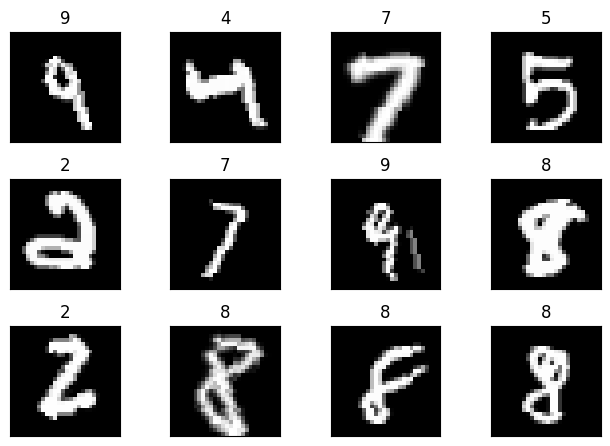

In [5]:
data_visualization(train_loader)

#Training and Evaluation

1. Creating an instance of the model and defining the optimizer
2. Defining the learning rate scheduler
3. Setting the number of epochs and starting the training loop

In [6]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4227 Batch_id=117 Accuracy=38.87: 100%|██████████| 118/118 [00:34<00:00,  3.45it/s]


Test set: Average loss: 0.3594, Accuracy: 8914/10000 (89.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1924 Batch_id=117 Accuracy=92.98: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.1217, Accuracy: 9597/10000 (95.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1482 Batch_id=117 Accuracy=95.85: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0640, Accuracy: 9790/10000 (97.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0274 Batch_id=117 Accuracy=97.00: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 0.0502, Accuracy: 9838/10000 (98.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0837 Batch_id=117 Accuracy=97.33: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0452, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0400 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.0412, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0306 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.0365, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0788 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0324, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0549 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0316, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0547 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0278, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0210 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:21<00:00,  5.62it/s]


Test set: Average loss: 0.0324, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0680 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]


Test set: Average loss: 0.0247, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0132 Batch_id=117 Accuracy=98.68: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0291, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0112 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.0250, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0109 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]


Test set: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0141 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0027 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0196, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0151 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0192, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0433 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0191, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1489 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]


Test set: Average loss: 0.0198, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.


##Plotting and Summary

Plotting the training and test accuracy/loss


Text(0.5, 1.0, 'Test Accuracy')

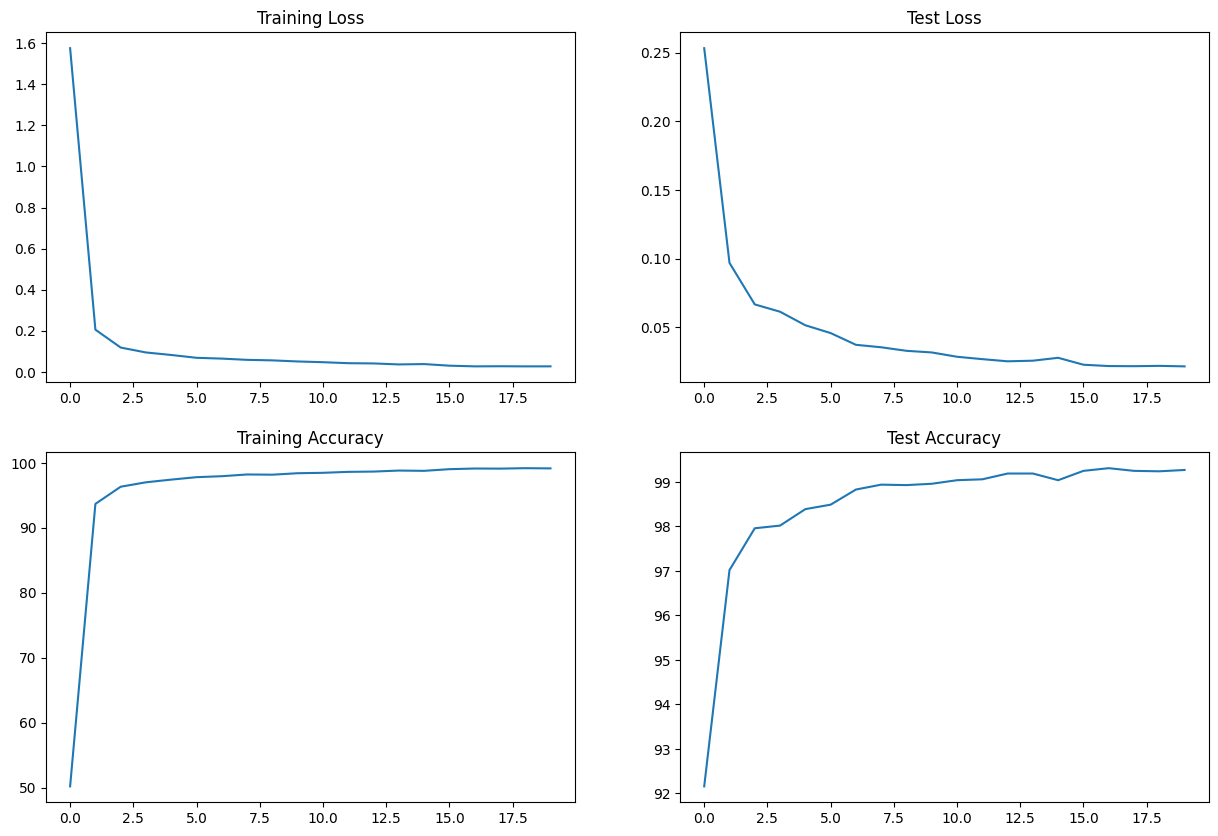

In [ ]:
train_test_plot()

Summary of the defined Model

In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
